# Hand written digits classifier

uses the sklearn handwritten digits set, and trains a neural network to classify these digits.

In [1]:
# Import packages
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
digits = load_digits()
images = pd.DataFrame(digits.data)
numbers = pd.Series(digits.target)

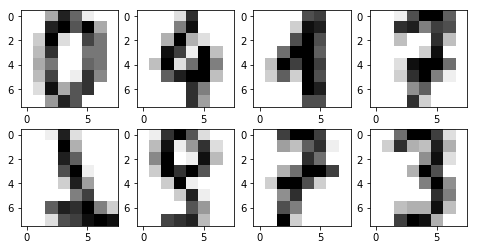

In [3]:
def generate_image(image):
    image = image.values.reshape(8,8)
    return col.imshow(image, cmap='gray_r')

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(8,4))

selection = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
x = 0

for row in ax:
    for col in row:
        generate_image(images.iloc[selection[x]])
        x+=1



# KNN Digit Classifier

In [4]:
def k_fold_cross_validation_accuracy(features, labels, k):
    knn = KNeighborsClassifier()
    kf = KFold(n_splits=4, shuffle=True)
    accuracy = cross_val_score(knn, features, labels, scoring='accuracy', cv=kf)
    return np.mean(accuracy)

In [5]:
ks = [1,2,3,4,5,8,10,15,20]
knn_accuracies = []

#compute accuracy
for k in ks:
    accuracy = k_fold_cross_validation_accuracy(images, numbers, k)
    knn_accuracies.append(accuracy)

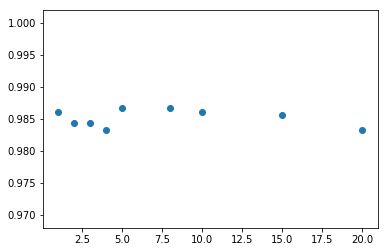

In [6]:
#plot accuracy
plt.scatter(x = ks, y=knn_accuracies)

# Neural Network

In [7]:
def neural_network_cross_validation_accuracy(features, labels, neuron, layer=0):
    if layer == 0:
        nn = MLPClassifier(hidden_layer_sizes=(neuron,), activation='relu', max_iter=1000)
    else:
        nn = MLPClassifier(hidden_layer_sizes=(neuron,neuron), activation='relu', max_iter=1000)
    kf = KFold(n_splits=4, shuffle=True)
    accuracy = cross_val_score(nn, features, labels, scoring='accuracy', cv=kf)
    return np.mean(accuracy)

In [8]:
neurons = [8,16,32,64,128,256]
nn_accuracies = []

#compute accuracy
for n in neurons:
    accuracy = neural_network_cross_validation_accuracy(images, numbers, n, 0)
    nn_accuracies.append(accuracy)

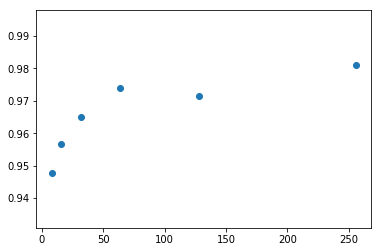

In [9]:
#plot accuracy
plt.scatter(x = neurons, y=nn_accuracies)

In [10]:
n64_accuracy = neural_network_cross_validation_accuracy(images, numbers, 64, 2)
print(n64_accuracy)

0.9738418708240534
